In [8]:
!pip install --upgrade ultralytics

In [11]:
!pip show ultralytics

Name: ultralytics
Version: 8.3.46
Summary: Ultralytics YOLO 🚀 for SOTA object detection, multi-object tracking, instance segmentation, pose estimation and image classification.
Home-page: https://ultralytics.com
Author: 
Author-email: Glenn Jocher <glenn.jocher@ultralytics.com>, Jing Qiu <jing.qiu@ultralytics.com>
License: AGPL-3.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: matplotlib, numpy, opencv-python, pandas, pillow, psutil, py-cpuinfo, pyyaml, requests, scipy, seaborn, torch, torchvision, tqdm, ultralytics-thop
Required-by: 


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd /content/drive/MyDrive/Colab Notebooks/HW_1

/content/drive/MyDrive/Colab Notebooks/HW_1


# Libs

In [10]:
import random
from ultralytics import YOLO
import os
import shutil
from collections import Counter
import cv2
import torch
from PIL import Image
from transformers import AutoProcessor, AutoModelForZeroShotObjectDetection
import albumentations as A

ModuleNotFoundError: No module named 'package'

In [ ]:
!unzip pigs.zip

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: pigs/train/images/Monta-1733-_jpg.rf.049c702621d892c7668b5ebe9a73281d.jpg  
  inflating: __MACOSX/pigs/train/images/._Monta-1733-_jpg.rf.049c702621d892c7668b5ebe9a73281d.jpg  
  inflating: pigs/train/images/170_jpg.rf.3a0e7245f2beaf9515fb00a631727e09.jpg  
  inflating: __MACOSX/pigs/train/images/._170_jpg.rf.3a0e7245f2beaf9515fb00a631727e09.jpg  
  inflating: pigs/train/images/Monta-414-_jpg.rf.14562cd288d08e1e695b8646d7136387.jpg  
  inflating: __MACOSX/pigs/train/images/._Monta-414-_jpg.rf.14562cd288d08e1e695b8646d7136387.jpg  
  inflating: pigs/train/images/72_jpg.rf.fc9779b42be04192d6d84dd24a0dec37.jpg  
  inflating: __MACOSX/pigs/train/images/._72_jpg.rf.fc9779b42be04192d6d84dd24a0dec37.jpg  
  inflating: pigs/train/images/109_bmp.rf.45beafc136201577c18398e9226bcf7e.jpg  
  inflating: __MACOSX/pigs/train/images/._109_bmp.rf.45beafc136201577c18398e9226bcf7e.jpg  
  inflating: pigs/train/images/181_bmp.

In [ ]:
model = YOLO('yolo11n.pt')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.35M/5.35M [00:00<00:00, 86.7MB/s]


In [ ]:
device = 'cuda:0'


image 1/1 /content/drive/MyDrive/Colab Notebooks/HW_1/person.jpeg: 640x640 1 person, 1 tie, 51.6ms
Speed: 3.8ms preprocess, 51.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


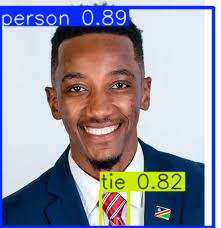

In [ ]:
results = model('person.jpeg') # вопросов нет, на людях обучена
results[0].show()


image 1/1 /content/drive/MyDrive/Colab Notebooks/HW_1/Yorkshire-boar.jpg.webp: 416x640 1 cow, 10.2ms
Speed: 1.8ms preprocess, 10.2ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 640)


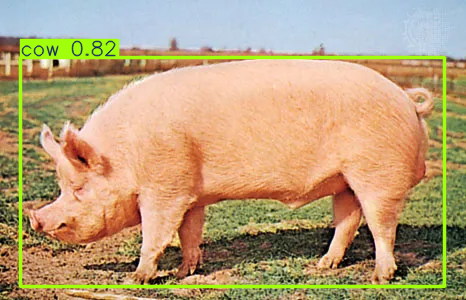

In [ ]:
results = model('/content/drive/MyDrive/Colab Notebooks/HW_1/Yorkshire-boar.jpg.webp') # Но пиг что-то совсем не видит
results[0].show()

В целом можем заметить следующее: Модель хорошо видит человека, но свиней она вообще никогда не видела. Я скачал уже готовый датасет со всеми метками, потому что работу с метками я уже проделывал в ноутбуке автора задачи, а здесь важно показать качество и саму модель. Скачал датасет я с портала roboflow. \
Данные там уже поделены на трейн, валидацию и тест, что уже круто, поэтому мы можем сразу запустить обучаться нашу yolo11n модель. Посмотртим качество на параметрах из ноутбука.

In [ ]:
model.train(data='/content/drive/MyDrive/Colab Notebooks/HW_1/pigs/data.yaml', device=device, plots=True, epochs=100, patience=10,
            batch=16)

Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/drive/MyDrive/Colab Notebooks/HW_1/pigs/data.yaml, epochs=100, time=None, patience=10, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda:0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_label

100%|██████████| 755k/755k [00:00<00:00, 21.7MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/drive/MyDrive/Colab Notebooks/HW_1/pigs/train/labels... 1758 images, 98 backgrounds, 0 corrupt: 100%|██████████| 1758/1758 [00:32<00:00, 54.27it/s] 


train: New cache created: /content/drive/MyDrive/Colab Notebooks/HW_1/pigs/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/Colab Notebooks/HW_1/pigs/valid/labels... 304 images, 17 backgrounds, 0 corrupt: 100%|██████████| 304/304 [00:07<00:00, 41.25it/s] 


val: New cache created: /content/drive/MyDrive/Colab Notebooks/HW_1/pigs/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.58G      2.107      2.558      2.051         89        640: 100%|██████████| 110/110 [00:53<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.42it/s]

                   all        304        527      0.797      0.272       0.31      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.54G      1.505      1.557      1.528         59        640: 100%|██████████| 110/110 [00:56<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.19it/s]


                   all        304        527      0.825      0.355      0.446      0.293

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.54G      1.398      1.329      1.428         48        640: 100%|██████████| 110/110 [00:53<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.56it/s]


                   all        304        527      0.513      0.525      0.529      0.328

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.67G       1.36      1.196      1.401         80        640: 100%|██████████| 110/110 [00:53<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.37it/s]

                   all        304        527      0.587      0.522       0.55      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100       2.6G      1.276      1.075      1.348         65        640: 100%|██████████| 110/110 [00:49<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.25it/s]

                   all        304        527      0.601      0.598      0.622      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.55G      1.241      1.032      1.321         68        640: 100%|██████████| 110/110 [00:49<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.99it/s]

                   all        304        527      0.574      0.614      0.634       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.61G      1.216     0.9823      1.311         61        640: 100%|██████████| 110/110 [00:50<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.85it/s]

                   all        304        527      0.681      0.638      0.694      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.59G      1.186     0.9375      1.278         55        640: 100%|██████████| 110/110 [00:51<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.74it/s]

                   all        304        527      0.669      0.649      0.674      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.53G      1.165     0.9011      1.266         92        640: 100%|██████████| 110/110 [00:50<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.51it/s]


                   all        304        527      0.771      0.678      0.757        0.5

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.56G      1.131     0.8686      1.245         89        640: 100%|██████████| 110/110 [00:48<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.83it/s]

                   all        304        527      0.682      0.635      0.704      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.49G      1.128     0.8743       1.25         76        640: 100%|██████████| 110/110 [00:47<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]

                   all        304        527      0.699      0.668      0.717      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.54G      1.102     0.8347      1.229         99        640: 100%|██████████| 110/110 [00:45<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.88it/s]

                   all        304        527      0.703      0.686      0.737      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.57G      1.108     0.8436      1.234         90        640: 100%|██████████| 110/110 [00:47<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.90it/s]

                   all        304        527      0.753      0.641      0.733       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.64G      1.097     0.8187      1.225         94        640: 100%|██████████| 110/110 [00:49<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.95it/s]

                   all        304        527      0.768      0.726      0.791      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.53G      1.084     0.8003      1.216         73        640: 100%|██████████| 110/110 [00:48<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.81it/s]

                   all        304        527      0.767      0.714      0.806      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.49G      1.089     0.7888      1.216        105        640: 100%|██████████| 110/110 [00:49<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.83it/s]

                   all        304        527      0.739      0.702      0.779      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.62G      1.045      0.765      1.195         47        640: 100%|██████████| 110/110 [00:49<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.74it/s]

                   all        304        527      0.738      0.741      0.799      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.56G      1.046     0.7553      1.197         34        640: 100%|██████████| 110/110 [00:47<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.53it/s]

                   all        304        527      0.782      0.739      0.813      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.52G      1.035     0.7474      1.183         69        640: 100%|██████████| 110/110 [00:44<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.98it/s]

                   all        304        527      0.754      0.707      0.801      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.51G      1.034     0.7479      1.182         50        640: 100%|██████████| 110/110 [00:47<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.01it/s]

                   all        304        527      0.828      0.694      0.803      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.49G      1.039     0.7332      1.191        105        640: 100%|██████████| 110/110 [00:48<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.99it/s]

                   all        304        527      0.783       0.71      0.801      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.57G      1.029     0.7226      1.173         88        640: 100%|██████████| 110/110 [00:50<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.87it/s]

                   all        304        527      0.802      0.714      0.819      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.54G      1.023     0.7106      1.179        108        640: 100%|██████████| 110/110 [00:51<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.52it/s]

                   all        304        527      0.803      0.723      0.813      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100       2.5G      1.016     0.7088      1.177         45        640: 100%|██████████| 110/110 [00:47<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.61it/s]

                   all        304        527       0.76      0.777      0.833      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.49G     0.9894     0.6793      1.155         78        640: 100%|██████████| 110/110 [00:46<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.97it/s]

                   all        304        527      0.771      0.772      0.814      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.44G      1.034     0.7125      1.182         70        640: 100%|██████████| 110/110 [00:48<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.90it/s]

                   all        304        527      0.722       0.79      0.838      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.47G     0.9863      0.685      1.156         96        640: 100%|██████████| 110/110 [00:49<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.20it/s]

                   all        304        527      0.787      0.749      0.813      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.71G      0.995     0.6859      1.153         71        640: 100%|██████████| 110/110 [00:53<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.72it/s]

                   all        304        527      0.816      0.737      0.838      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.51G     0.9757     0.6642       1.15         56        640: 100%|██████████| 110/110 [00:50<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.13it/s]

                   all        304        527      0.801      0.751      0.835      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.56G     0.9939     0.6821      1.156         88        640: 100%|██████████| 110/110 [00:51<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.01it/s]

                   all        304        527      0.789      0.781      0.849      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100       2.5G     0.9875     0.6817      1.157         49        640: 100%|██████████| 110/110 [00:50<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.00it/s]

                   all        304        527      0.793       0.79      0.839      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100       2.5G     0.9716     0.6671      1.141         69        640: 100%|██████████| 110/110 [00:47<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.67it/s]

                   all        304        527      0.795      0.754      0.837      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.67G     0.9567     0.6519      1.134         86        640: 100%|██████████| 110/110 [00:47<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.63it/s]

                   all        304        527      0.747      0.767      0.835      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.56G     0.9739     0.6517      1.146        117        640: 100%|██████████| 110/110 [00:46<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.89it/s]

                   all        304        527      0.821       0.75       0.84       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.56G     0.9623     0.6408       1.14         87        640: 100%|██████████| 110/110 [00:47<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.51it/s]

                   all        304        527      0.834      0.725       0.83      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.54G     0.9804     0.6418      1.155         60        640: 100%|██████████| 110/110 [00:49<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.78it/s]

                   all        304        527      0.801       0.75       0.83      0.613
EarlyStopping: Training stopped early as no improvement observed in last 10 epochs. Best results observed at epoch 26, best model saved as best.pt.
To update EarlyStopping(patience=10) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



36 epochs completed in 0.557 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.4MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.4MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.22it/s]


                   all        304        527      0.721      0.789      0.839      0.615
                person        184        310      0.727      0.665      0.758      0.482
                   pig        103        217      0.715      0.913      0.919      0.748
Speed: 0.2ms preprocess, 3.4ms inference, 0.0ms loss, 6.3ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7dd9bafdfa60>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [ ]:
model.save("person_pig.pt") # сохраним обученную модель


image 1/1 /content/drive/MyDrive/Colab Notebooks/HW_1/person.jpeg: 640x640 1 person, 11.8ms
Speed: 3.0ms preprocess, 11.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


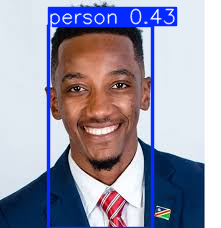

In [ ]:
my_model = YOLO("person_pig.pt") # загрузим, посмотрим, как она справляется
results = my_model.predict("person.jpeg")
results[0].show()


image 1/1 /content/drive/MyDrive/Colab Notebooks/HW_1/Yorkshire-boar.jpg.webp: 416x640 1 pig, 48.1ms
Speed: 2.5ms preprocess, 48.1ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 640)


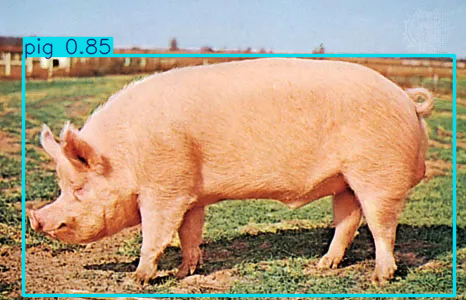

In [ ]:
results = my_model.predict("/content/drive/MyDrive/Colab Notebooks/HW_1/Yorkshire-boar.jpg.webp") # посмотрим на pig
results[0].show()

In [ ]:
metrics = model.val(data='/content/drive/MyDrive/Colab Notebooks/HW_1/pigs/data.yaml', split="test", device=device) # замерим качесвто

Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/drive/MyDrive/Colab Notebooks/HW_1/pigs/test/labels... 153 images, 8 backgrounds, 0 corrupt: 100%|██████████| 153/153 [00:01<00:00, 83.52it/s] 


val: New cache created: /content/drive/MyDrive/Colab Notebooks/HW_1/pigs/test/labels.cache


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.54it/s]


                   all        153        396      0.944      0.935      0.981      0.791
                   pig        145        396      0.944      0.935      0.981      0.791
Speed: 0.6ms preprocess, 9.7ms inference, 0.0ms loss, 3.1ms postprocess per image
Results saved to runs/detect/train3


Если бы я просто залил такой ноутбук, то я бы, наверное, сильно вас разочаровал. Наверное, хотелось увидеть, где я сам размечаю данные, придумываю промты и тд, но, а зачем, когда можно порабоать с уже размеченным датасетом. Простите, что так много ноутбуков наплодил, но как бы задание не очень понятно, как делать. \
С учетом того, что я не делал ни аугментации, ни чего-то такого. Можем применить аугментацию к этому датасету и посмотреть, улучшится ли качество

In [ ]:
def combine_directories(base_dir, output_dir_images, output_dir_labels):
    """
    Объединяет содержимое директорий train, test и valid в отдельные папки images и labels.

    :param base_dir: Путь к основной директории (например, "pigs").
    :param output_dir_images: Путь к папке для объединённых изображений.
    :param output_dir_labels: Путь к папке для объединённых аннотаций.
    """
    # Убедимся, что выходные папки существуют
    os.makedirs(output_dir_images, exist_ok=True)
    os.makedirs(output_dir_labels, exist_ok=True)

    # Директории train, test, valid
    subsets = ['train', 'test', 'valid']

    for subset in subsets:
        subset_dir_images = os.path.join(base_dir, subset, 'images')
        subset_dir_labels = os.path.join(base_dir, subset, 'labels')

        # Копируем изображения
        if os.path.exists(subset_dir_images):
            for file_name in os.listdir(subset_dir_images):
                src_file = os.path.join(subset_dir_images, file_name)
                dst_file = os.path.join(output_dir_images, file_name)
                if os.path.isfile(src_file):  # Проверяем, что это файл
                    shutil.copy(src_file, dst_file)

        # Копируем аннотации
        if os.path.exists(subset_dir_labels):
            for file_name in os.listdir(subset_dir_labels):
                src_file = os.path.join(subset_dir_labels, file_name)
                dst_file = os.path.join(output_dir_labels, file_name)
                if os.path.isfile(src_file):  # Проверяем, что это файл
                    shutil.copy(src_file, dst_file)

    print("Объединение завершено!")
    print(f"Изображения сохранены в: {output_dir_images}")
    print(f"Аннотации сохранены в: {output_dir_labels}")


In [ ]:
base_directory = "pigs"  # Основная директория
output_images = "dataset/images"  # Папка для объединённых изображений
output_labels = "dataset/labels"  # Папка для объединённых аннотаций

combine_directories(base_directory, output_images, output_labels)

Объединение завершено!
Изображения сохранены в: dataset/images
Аннотации сохранены в: dataset/labels


In [ ]:
def count_class_balance_first_line(labels_dir):
    """
    Подсчитывает количество объектов каждого класса, учитывая только первую строку каждого файла аннотации.

    :param labels_dir: Путь к директории с файлами аннотаций (labels).
    :return: Словарь с количеством объектов каждого класса.
    """
    class_counter = Counter()

    # Проверяем наличие папки labels
    if not os.path.exists(labels_dir):
        raise FileNotFoundError(f"Папка '{labels_dir}' не найдена.")
    # Перебираем файлы аннотаций
    for label_file in os.listdir(labels_dir):
        if label_file.endswith('.txt'):  # Убедимся, что это файл аннотации
            file_path = os.path.join(labels_dir, label_file)
            with open(file_path, 'r') as f:
                first_line = f.readline().strip()  # Читаем первую строку
                if first_line:  # Если строка не пустая
                    class_id = first_line.split()[0]  # Первый элемент строки - class_id
                    class_counter[int(class_id)] += 1

    return class_counter

In [ ]:
# Путь к labels
labels_directory = "dataset/labels"

# Баланс классов
class_balance = count_class_balance_first_line(labels_directory)

# Вывод результатов
print("Баланс классов:")
for class_id, count in sorted(class_balance.items()):
    print(f"Класс {class_id}: {count} объектов")

Баланс классов:
Класс 0: 374 объектов
Класс 1: 1718 объектов


Странно, похоже некоторые фотографии не размечены, да и даже так баланс классов особо не радует. Забыл отметить \


*   0 - person
*   1 - pig

Получается план у нас следующий:


*   Удалить неразмеченные и файлы разметки к ним (просто быстрый просмотр пары фотографий показал, что они не очень)
*   Поискать еще фотографий person и фотографии pigs. Добьем до 2к оба класса, а потом навесим еще аугментацию.



# Найдем пустые плохие файлы и удалим их

In [ ]:
def delete_empty_label_files(labels_dir, images_dir):
    """
    Находит пустые файлы в labels_dir и удаляет их вместе с соответствующими файлами в images_dir.

    :param labels_dir: Путь к директории с файлами аннотаций (labels).
    :param images_dir: Путь к директории с файлами изображений (images).
    """
    if not os.path.exists(labels_dir):
        raise FileNotFoundError(f"Папка '{labels_dir}' не найдена.")
    if not os.path.exists(images_dir):
        raise FileNotFoundError(f"Папка '{images_dir}' не найдена.")

    # Перебираем файлы в labels
    for label_file in os.listdir(labels_dir):
        label_path = os.path.join(labels_dir, label_file)

        # Проверяем, пустой ли файл
        if os.path.isfile(label_path) and os.path.getsize(label_path) == 0:
            print(f"Найден пустой файл аннотации: {label_file}")

            # Удаляем файл аннотации
            os.remove(label_path)
            print(f"Удалён: {label_path}")

            # Ищем соответствующий файл изображения
            image_file = os.path.splitext(label_file)[0] + ".jpg"
            image_path = os.path.join(images_dir, image_file)
            if os.path.exists(image_path):
                os.remove(image_path)
                print(f"Удалено соответствующее изображение: {image_path}")

In [ ]:
labels_directory = "dataset/labels"
images_directory = "dataset/images"

delete_empty_label_files(labels_directory, images_directory)


Найден пустой файл аннотации: WIN_20230110_10_52_32_Pro_jpg.rf.8f513eca5c9d9782c265058364a24091.txt
Удалён: dataset/labels/WIN_20230110_10_52_32_Pro_jpg.rf.8f513eca5c9d9782c265058364a24091.txt
Удалено соответствующее изображение: dataset/images/WIN_20230110_10_52_32_Pro_jpg.rf.8f513eca5c9d9782c265058364a24091.jpg
Найден пустой файл аннотации: WIN_20230110_10_26_08_Pro_jpg.rf.d683627d9ffac622933e9d621711b678.txt
Удалён: dataset/labels/WIN_20230110_10_26_08_Pro_jpg.rf.d683627d9ffac622933e9d621711b678.txt
Удалено соответствующее изображение: dataset/images/WIN_20230110_10_26_08_Pro_jpg.rf.d683627d9ffac622933e9d621711b678.jpg
Найден пустой файл аннотации: 1388_jpg.rf.5adaa833476a7a32aa602e5a3c3ff642.txt
Удалён: dataset/labels/1388_jpg.rf.5adaa833476a7a32aa602e5a3c3ff642.txt
Удалено соответствующее изображение: dataset/images/1388_jpg.rf.5adaa833476a7a32aa602e5a3c3ff642.jpg
Найден пустой файл аннотации: 62542_51821_4739_jpg.rf.d20164dff6df140d2fff2bda476f906e.txt
Удалён: dataset/labels/6254

# Новые данные

Понятно, что прошлые данные размечал не я. Первая причина - лень, вторая мне просто удачно попался на глаза хороший датасет без аугментаций (хороший потому что я сам их еще применю). НО все же поскольку немного нечестно, что я просто нашел хорошие датасеты, а с разметкой так и не поработал. \
Поэтому поступим следующим образом: дополнительных person я скачал даже в избытке с roboflow уже размеченными, а вот дополнительных pig я нашел неразмеченными. Поэтому их мы разметим так же как и в ноутбуке автора с помощью GroundingDino и для каждого так же создадим label.

ВАЖНАЯ РЕМАРКА!! \
Колаб такая штука, что бывает не дает гпушкой пользоваться с одного акка. Так вот на прошлом аккаунте закончился лимит, я пересел на другой, поэтому сейчас немного будет отличаться код, но в целом в этом блоке мы просто хотим получить доп инфу.

## Pigs
Все изображения у нас 640x640, заметим что я скачал 416x416, надо бы исправить это недоразумение

In [ ]:
!unzip pig_additional_images.zip

Archive:  pig_additional_images.zip
   creating: pig_additional_images/
  inflating: __MACOSX/._pig_additional_images  
  inflating: pig_additional_images/01GEMZ41T1N8EQ8X30GQS2YBMH_jpeg.rf.742392191c85fb98f448ed11b7939d2d.jpg  
  inflating: __MACOSX/pig_additional_images/._01GEMZ41T1N8EQ8X30GQS2YBMH_jpeg.rf.742392191c85fb98f448ed11b7939d2d.jpg  
  inflating: pig_additional_images/01GEMZ647C6C9J313PFK2DCESG_jpeg.rf.cd37afcd5d1667ee7412b248f98c8d9f.jpg  
  inflating: __MACOSX/pig_additional_images/._01GEMZ647C6C9J313PFK2DCESG_jpeg.rf.cd37afcd5d1667ee7412b248f98c8d9f.jpg  
  inflating: pig_additional_images/01GEMZ63ZQF7SPENW3Q7SEJVH3_jpeg.rf.1e042f6575a54380e40bea57da6d412f.jpg  
  inflating: __MACOSX/pig_additional_images/._01GEMZ63ZQF7SPENW3Q7SEJVH3_jpeg.rf.1e042f6575a54380e40bea57da6d412f.jpg  
  inflating: pig_additional_images/01GEMZ35A87YG4RK91Z8G0SJNZ_jpeg.rf.eebcb3147d35c302a6a0df8e63637a38.jpg  
  inflating: __MACOSX/pig_additional_images/._01GEMZ35A87YG4RK91Z8G0SJNZ_jpeg.rf.eeb

In [ ]:
def resize_images(input_dir, output_dir, target_size=(640, 640)):
    """
    Изменяет размер всех изображений в папке до указанного размера.

    :param input_dir: Путь к папке с исходными изображениями.
    :param output_dir: Путь к папке, куда будут сохранены изменённые изображения.
    :param target_size: Кортеж (ширина, высота), до которого изменить размер.
    """
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for file_name in os.listdir(input_dir):
        if file_name.endswith(('.jpg', '.jpeg', '.png')):  # Поддерживаемые форматы
            input_path = os.path.join(input_dir, file_name)
            output_path = os.path.join(output_dir, file_name)

            # Читаем изображение
            image = cv2.imread(input_path)
            if image is None:
                print(f"Пропущено: {file_name} (не удалось прочитать)")
                continue

            # Изменяем размер изображения
            resized_image = cv2.resize(image, target_size, interpolation=cv2.INTER_LINEAR)

            # Сохраняем изменённое изображение
            cv2.imwrite(output_path, resized_image)
            print(f"Изменён размер и сохранено: {output_path}")

In [ ]:
# Параметры
input_directory = "pig_additional_images/"  # Папка с исходными изображениями
output_directory = "pig_resized/"  # Папка для сохранения изменённых изображений
resize_images(input_directory, output_directory, target_size=(640, 640))

Изменён размер и сохранено: pig_resized/01GEMZ41T1N8EQ8X30GQS2YBMH_jpeg.rf.742392191c85fb98f448ed11b7939d2d.jpg
Изменён размер и сохранено: pig_resized/01GEMZ647C6C9J313PFK2DCESG_jpeg.rf.cd37afcd5d1667ee7412b248f98c8d9f.jpg
Изменён размер и сохранено: pig_resized/01GEMZ63ZQF7SPENW3Q7SEJVH3_jpeg.rf.1e042f6575a54380e40bea57da6d412f.jpg
Изменён размер и сохранено: pig_resized/01GEMZ35A87YG4RK91Z8G0SJNZ_jpeg.rf.eebcb3147d35c302a6a0df8e63637a38.jpg
Изменён размер и сохранено: pig_resized/01GEMZN8B9EKG3A3YSF0Q4CW6Y_jpeg.rf.5a5ea8da35225c8556b73e7850d27002.jpg
Изменён размер и сохранено: pig_resized/01GEMZNEQ0BVYWXZ6KB8NPQR37_jpeg.rf.fe63007257fd8ee43ec5d598e12de93b.jpg
Изменён размер и сохранено: pig_resized/01GEMZ6JNFX47JZETX9CHGWNAB_jpeg.rf.a01b37edd87616c2b633eb59738ca56a.jpg
Изменён размер и сохранено: pig_resized/01GEMZ6JBWE3A378W209FBST4R_jpeg.rf.a0bed5043f089db1c8b7615e14016643.jpg
Изменён размер и сохранено: pig_resized/01GEMZ5NA5Y1HQYDGJXJMCZ7YY_jpeg.rf.a7770b304179f0da7ead9a0ef81ab

In [ ]:
model_id = "IDEA-Research/grounding-dino-base"
device = "cuda" if torch.cuda.is_available() else "cpu"

processor = AutoProcessor.from_pretrained(model_id)
model = AutoModelForZeroShotObjectDetection.from_pretrained(model_id).to(device)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/457 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.24k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.74k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/933M [00:00<?, ?B/s]

In [ ]:
import matplotlib.pyplot as plt
from PIL import ImageDraw, ImageFont
# Воспользуемся нашей функцией для подбора промта
def detect_and_draw_with_confidence(image_path, text, size_text  = 70):
    image = Image.open(image_path).convert("RGB")

    inputs = processor(images=image, text=text, return_tensors="pt").to(device)

    with torch.no_grad():
        outputs = model(**inputs)

    results = processor.post_process_grounded_object_detection(
        outputs,
        inputs.input_ids,
        box_threshold=0.35,# Повысил немного, чтобы уж не совсем быть неуверенным
        text_threshold=0.3,
        target_sizes=[image.size[::-1]]
    )

    draw = ImageDraw.Draw(image)
    font = ImageFont.load_default(size=size_text) # size = size_text to make the confidences more visual
    detection_confidences = []  # list of confidences for each detection

    for result in results:
        boxes = result['boxes'].cpu().numpy()  # Convert to numpy array
        scores = result['scores'].cpu().numpy()
        labels = result['labels']

        for box, score, label in zip(boxes, scores, labels):
            if label:
                box = [int(b) for b in box]
                draw.rectangle(box, outline="magenta", width=5) # I prefer magenta for color :)
                draw.text((box[0], box[1]), f"{label}: {score:.2f}", fill="magenta", font=font)

                detection_confidences.append({'label': label, 'confidence': score, 'box': box}) # Add detection_confidences to list with label and box

    # Display the image with bounding boxes
    plt.figure(figsize=(5, 5))
    plt.imshow(image)
    plt.axis("off")
    plt.show()
    return detection_confidences


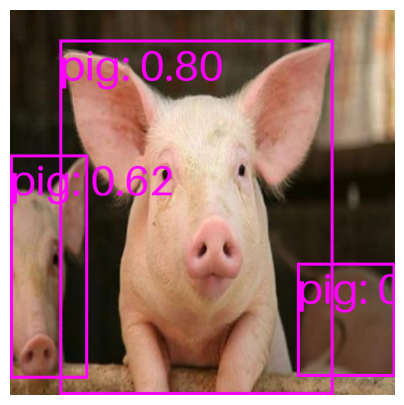

[{'label': 'pig', 'confidence': 0.7951797, 'box': [82, 49, 537, 639]},
 {'label': 'pig', 'confidence': 0.6190372, 'box': [0, 240, 129, 612]},
 {'label': 'pig', 'confidence': 0.47765502, 'box': [477, 420, 640, 609]}]

In [ ]:
detect_and_draw_with_confidence("/content/drive/MyDrive/pig_resized/01GEMZ32QF7SWQTN9SB01GVNM2_jpeg.rf.3c2b582b1159fafd5e9d54669f781c22.jpg", ['pig.'])

Действительно pig он выделяет, так что теперь осталось так же разметить остальные данные

In [ ]:
import shutil
def detect_and_save_yolo_labels(image_path, images_dir, labels_dir, prompt="pig.", class_id=1, box_threshold=0.35, text_threshold=0.3):
    """
    Размечает изображение и сохраняет labels в формате YOLO.

    :param image_path: Путь к изображению.
    :param images_dir: Папка для сохранения изображений.
    :param labels_dir: Папка для сохранения labels.
    :param prompt: Промт для поиска объектов.
    :param class_id: Класс для YOLO labels (целое число).
    :param box_threshold: Порог для фильтрации bounding boxes.
    :param text_threshold: Порог для фильтрации текста.
    """
    # Открываем изображение
    image = Image.open(image_path).convert("RGB")

    # Подготовка данных для модели
    inputs = processor(images=image, text=prompt, return_tensors="pt").to(device)

    # Предсказание
    with torch.no_grad():
        outputs = model(**inputs)

    # Постобработка результатов
    results = processor.post_process_grounded_object_detection(
        outputs=outputs,
        input_ids=inputs.input_ids,
        box_threshold=box_threshold,
        text_threshold=text_threshold,
        target_sizes=[image.size[::-1]]
    )

    # Формирование labels в YOLO формате
    yolo_labels = []
    for result in results:
        boxes = result["boxes"].cpu().numpy()  # Преобразование в numpy массив
        scores = result["scores"].cpu().numpy()

        for box, score in zip(boxes, scores):
            if score >= box_threshold:
                x_min, y_min, x_max, y_max = box.tolist()

                # Преобразование координат в YOLO формат
                x_center = (x_min + x_max) / 2 / image.width
                y_center = (y_min + y_max) / 2 / image.height
                width = (x_max - x_min) / image.width
                height = (y_max - y_min) / image.height

                # Добавление label в список
                yolo_labels.append(f"{class_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}\n")

    # Сохранение labels
    os.makedirs(labels_dir, exist_ok=True)
    label_file = os.path.join(labels_dir, os.path.splitext(os.path.basename(image_path))[0] + ".txt")
    with open(label_file, "w") as f:
        f.writelines(yolo_labels)

    # Копирование изображения в папку images
    os.makedirs(images_dir, exist_ok=True)
    shutil.copy(image_path, os.path.join(images_dir, os.path.basename(image_path)))

    print(f"Сохранены labels: {label_file}")
    print(f"Сохранено изображение: {os.path.join(images_dir, os.path.basename(image_path))}")

In [ ]:
input_dir = "pig_resized"  # Папка с исходными изображениями
images_dir = "new_pig/images"  # Папка для сохранения изображений
labels_dir = "new_pig/labels"  # Папка для сохранения лейблов
prompt = "pig."  # Промт для поиска объектов
class_id = 1  # Класс для лейблов pigs

# Разметка изображений
for image_file in os.listdir(input_dir):
    if image_file.endswith(('.jpg', '.jpeg', '.png')):
        image_path = os.path.join(input_dir, image_file)
        detect_and_save_yolo_labels(image_path, images_dir, labels_dir, prompt=prompt, class_id=class_id)

Сохранены labels: new_pig/labels/01GEMZ41T1N8EQ8X30GQS2YBMH_jpeg.rf.742392191c85fb98f448ed11b7939d2d.txt
Сохранено изображение: new_pig/images/01GEMZ41T1N8EQ8X30GQS2YBMH_jpeg.rf.742392191c85fb98f448ed11b7939d2d.jpg
Сохранены labels: new_pig/labels/01GEMZ647C6C9J313PFK2DCESG_jpeg.rf.cd37afcd5d1667ee7412b248f98c8d9f.txt
Сохранено изображение: new_pig/images/01GEMZ647C6C9J313PFK2DCESG_jpeg.rf.cd37afcd5d1667ee7412b248f98c8d9f.jpg
Сохранены labels: new_pig/labels/01GEMZ63ZQF7SPENW3Q7SEJVH3_jpeg.rf.1e042f6575a54380e40bea57da6d412f.txt
Сохранено изображение: new_pig/images/01GEMZ63ZQF7SPENW3Q7SEJVH3_jpeg.rf.1e042f6575a54380e40bea57da6d412f.jpg
Сохранены labels: new_pig/labels/01GEMZ35A87YG4RK91Z8G0SJNZ_jpeg.rf.eebcb3147d35c302a6a0df8e63637a38.txt
Сохранено изображение: new_pig/images/01GEMZ35A87YG4RK91Z8G0SJNZ_jpeg.rf.eebcb3147d35c302a6a0df8e63637a38.jpg
Сохранены labels: new_pig/labels/01GEMZN8B9EKG3A3YSF0Q4CW6Y_jpeg.rf.5a5ea8da35225c8556b73e7850d27002.txt
Сохранено изображение: new_pig/imag

## Person

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
!unzip 'Person_detection.zip'

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: Person_detection/train/labels/photo-1528668081369-c6352576af0d_jpg.rf.4700e6824487ca5471330d3a8327221e.txt  
  inflating: __MACOSX/Person_detection/train/labels/._photo-1528668081369-c6352576af0d_jpg.rf.4700e6824487ca5471330d3a8327221e.txt  
  inflating: Person_detection/train/labels/photo-1521100355071-07f6e06de80b_jpg.rf.58df813b9727bdcdd1082552e591fdfe.txt  
  inflating: __MACOSX/Person_detection/train/labels/._photo-1521100355071-07f6e06de80b_jpg.rf.58df813b9727bdcdd1082552e591fdfe.txt  
  inflating: Person_detection/train/labels/premium_photo-1661389549984-d97d5b086820_jpg.rf.bde57526cb207ec92c837f4fcc639b82.txt  
  inflating: __MACOSX/Person_detection/train/labels/._premium_photo-1661389549984-d97d5b086820_jpg.rf.bde57526cb207ec92c837f4fcc639b82.txt  
  inflating: Person_detection/train/labels/photo-1525691323833-1e2671245e29_jpg.rf.eee6a5b521bd1925c61cf25b9184b31b.txt  
  inflating: __MACOSX/Person_

In [ ]:
base_directory = "Person_detection/"  # Основная директория
output_images = "/content/drive/MyDrive/new_person/images"
output_labels = "/content/drive/MyDrive/new_person/labels"

combine_directories(base_directory, output_images, output_labels)

Объединение завершено!
Изображения сохранены в: /content/drive/MyDrive/new_person/images
Аннотации сохранены в: /content/drive/MyDrive/new_person/labels


Напомню \
Баланс классов:

* Класс 0: 374 объектов
* Класс 1: 1718 объектов \
Побудем перфекционистами и отберем случайно 1686 объектов для класса 0, и 282 объекта класса 1


In [ ]:
def select_random_files(input_dir_images, input_dir_labels, output_dir, num_samples, class_name):
    """
    Случайно выбирает заданное количество файлов и сохраняет их в указанную директорию,
    проверяя, чтобы файл labels для изображения не был пустым.

    :param input_dir_images: Папка с изображениями.
    :param input_dir_labels: Папка с labels.
    :param output_dir: Папка для сохранения выбранных файлов.
    :param num_samples: Количество файлов для отбора.
    :param class_name: Имя класса для вывода (например, 'class 0').
    """
    # Список всех файлов в папке images
    image_files = [f for f in os.listdir(input_dir_images) if os.path.isfile(os.path.join(input_dir_images, f))]

    # Проверка на доступное количество файлов
    if len(image_files) < num_samples:
        raise ValueError(f"Недостаточно файлов в {class_name}: требуется {num_samples}, доступно {len(image_files)}")

    # Папки для сохранения
    output_images = os.path.join(output_dir, "images")
    output_labels = os.path.join(output_dir, "labels")
    os.makedirs(output_images, exist_ok=True)
    os.makedirs(output_labels, exist_ok=True)

    selected_files = []  # Список для хранения окончательного выбора

    while len(selected_files) < num_samples:
        # Случайно выбираем файл
        file_name = random.choice(image_files)
        label_name = os.path.splitext(file_name)[0] + ".txt"
        src_label_path = os.path.join(input_dir_labels, label_name)

        # Проверяем, что label существует и не пустой
        if os.path.exists(src_label_path) and os.path.getsize(src_label_path) > 0:
            selected_files.append(file_name)
            image_files.remove(file_name)  # Убираем файл из доступного списка

    # Копирование выбранных файлов и соответствующих labels
    for file_name in selected_files:
        # Копируем изображение
        src_image_path = os.path.join(input_dir_images, file_name)
        dst_image_path = os.path.join(output_images, file_name)
        shutil.copy(src_image_path, dst_image_path)

        # Копируем label
        label_name = os.path.splitext(file_name)[0] + ".txt"
        src_label_path = os.path.join(input_dir_labels, label_name)
        dst_label_path = os.path.join(output_labels, label_name)
        shutil.copy(src_label_path, dst_label_path)

    print(f"Для {class_name} выбрано и сохранено {num_samples} файлов в {output_images} и {output_labels}")

In [ ]:
new_person_images = "/content/drive/MyDrive/new_person/images"
new_person_labels = "/content/drive/MyDrive/new_person/labels"
new_pig_images = "/content/drive/MyDrive/new_pig/images"
new_pig_labels = "/content/drive/MyDrive/new_pig/labels"
new_dataset = "/content/drive/MyDrive/new_dataset"

# Отбор файлов
select_random_files(new_person_images, new_person_labels, new_dataset, 1686, "class 0 (new_person)")
select_random_files(new_pig_images, new_pig_labels, new_dataset, 282, "class 1 (new_pig)")

print("Все файлы успешно отобраны и сохранены в new_dataset")

Для class 0 (new_person) выбрано и сохранено 1686 файлов в /content/drive/MyDrive/new_dataset/images и /content/drive/MyDrive/new_dataset/labels
Для class 1 (new_pig) выбрано и сохранено 282 файлов в /content/drive/MyDrive/new_dataset/images и /content/drive/MyDrive/new_dataset/labels
Все файлы успешно отобраны и сохранены в new_dataset


In [ ]:
# Проверка
# Путь к labels
labels_directory = "new_dataset/labels"

# Баланс классов
class_balance = count_class_balance_first_line(labels_directory)

# Вывод результатов
print("Баланс классов:")
for class_id, count in sorted(class_balance.items()):
    print(f"Класс {class_id}: {count} объектов")

Баланс классов:
Класс 0: 1686 объектов
Класс 1: 282 объектов


In [ ]:
!zip -r /content/drive/MyDrive/new_dataset.zip /content/drive/MyDrive/new_dataset

  adding: content/drive/MyDrive/new_dataset/ (stored 0%)
  adding: content/drive/MyDrive/new_dataset/images/ (stored 0%)
  adding: content/drive/MyDrive/new_dataset/images/photo-1530648188125-a0c1055fee8f_jpg.rf.babc27409cc2a711d19f8a8f09dbac74.jpg (deflated 0%)
  adding: content/drive/MyDrive/new_dataset/images/photo-1526746115251-3caa6bc7533f_jpg.rf.2aa3352274b536f9386852b744d9a2eb.jpg (deflated 1%)
  adding: content/drive/MyDrive/new_dataset/images/photo-1528409739281-ea3c54284542_jpg.rf.3f104656b75df9f468649075369fc113.jpg (deflated 0%)
  adding: content/drive/MyDrive/new_dataset/images/photo-1533053155020-e1af89779f0e_jpg.rf.da9cddba1cabb34040b1eb31d7f22ca8.jpg (deflated 1%)
  adding: content/drive/MyDrive/new_dataset/images/photo-1551108168-229956dd31bf_jpg.rf.6ff0e176fc0acc6b5f4e6838b42f9eb8.jpg (deflated 1%)
  adding: content/drive/MyDrive/new_dataset/images/photo-1542371829-01086bea6924_jpg.rf.72cdea4985a3114e1ee761415a775c9a.jpg (deflated 1%)
  adding: content/drive/MyDrive/n

In [ ]:
ls

'Additional data'/   new_dataset/    pig.jpeg   runs/             Yorkshire-boar.jpg.webp
 dataset/            person.jpeg     pigs/      yolo11n.pt
 __MACOSX/           person_pig.pt   pigs.zip   Yolo_work.ipynb


In [ ]:
!unzip new_dataset.zip

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: new_dataset/images/01GEMZ3APNES6V5HVZBJTJAA8D_jpeg.rf.ae6f38115f28072c632e79b4a9adbf48.jpg  
  inflating: __MACOSX/new_dataset/images/._01GEMZ3APNES6V5HVZBJTJAA8D_jpeg.rf.ae6f38115f28072c632e79b4a9adbf48.jpg  
  inflating: new_dataset/images/photo-1488623922219-7328d3edce78_jpg.rf.bc86645aa4348673b7389f4b495b03cd.jpg  
  inflating: __MACOSX/new_dataset/images/._photo-1488623922219-7328d3edce78_jpg.rf.bc86645aa4348673b7389f4b495b03cd.jpg  
  inflating: new_dataset/images/photo-1467911924913-a48e954914e1_jpg.rf.cf4f3043c662668b4d4e4e631fac753b.jpg  
  inflating: __MACOSX/new_dataset/images/._photo-1467911924913-a48e954914e1_jpg.rf.cf4f3043c662668b4d4e4e631fac753b.jpg  
  inflating: new_dataset/images/pexels-photo-3184287_jpeg.rf.6855e08ac9698bbe42d590496c30b974.jpg  
  inflating: __MACOSX/new_dataset/images/._pexels-photo-3184287_jpeg.rf.6855e08ac9698bbe42d590496c30b974.jpg  
  inflating: new_dataset/images/

In [ ]:
def merge_datasets(dataset1_path, dataset2_path):
    """
    Объединяет две папки с поддиректориями images и labels в одну.

    :param dataset1_path: Путь к основной папке (dataset), куда будут добавлены данные.
    :param dataset2_path: Путь к папке, файлы которой нужно добавить (new_dataset).
    """
    for subfolder in ['images', 'labels']:
        # Пути к поддиректориям
        dataset1_subfolder = os.path.join(dataset1_path, subfolder)
        dataset2_subfolder = os.path.join(dataset2_path, subfolder)

        # Убедимся, что поддиректории существуют
        os.makedirs(dataset1_subfolder, exist_ok=True)

        # Перемещение файлов из dataset2 в dataset1
        if os.path.exists(dataset2_subfolder):
            for file_name in os.listdir(dataset2_subfolder):
                src_path = os.path.join(dataset2_subfolder, file_name)
                dst_path = os.path.join(dataset1_subfolder, file_name)

                # Проверяем, не существует ли файл с таким именем
                if os.path.exists(dst_path):
                    print(f"Файл {file_name} уже существует в {dataset1_subfolder}, пропускаем.")
                else:
                    shutil.move(src_path, dst_path)

    print(f"Объединение завершено. Все данные перемещены в {dataset1_path}.")

# Пути к папкам
dataset1 = "dataset"
dataset2 = "new_dataset"

# Запуск объединения
merge_datasets(dataset1, dataset2)


Объединение завершено. Все данные перемещены в dataset.


Проверим баланс классов. Теперь получше

In [ ]:
# Путь к labels
labels_directory = "dataset/labels"

# Баланс классов
class_balance = count_class_balance_first_line(labels_directory)

# Вывод результатов
print("Баланс классов:")
for class_id, count in sorted(class_balance.items()):
    print(f"Класс {class_id}: {count} объектов")

Баланс классов:
Класс 0: 2059 объектов
Класс 1: 2000 объектов


Сохраним достижение

In [ ]:
!zip -r dataset.zip dataset/

Выходные данные были обрезаны до нескольких последних строк (5000).
  adding: dataset/images/photo-1525157381335-8d400396ad8a_jpg.rf.cfceb834e1cdc2933b9dc61f18020cc1.jpg (deflated 1%)
  adding: dataset/images/photo-1485056616736-b0840bdf4732_jpg.rf.36f0aec853c241fa305965478e55ed59.jpg (deflated 3%)
  adding: dataset/images/photo-1532980083932-542531102b18_jpg.rf.04cf65ceec6586ac5b1b2805fb6d4578.jpg (deflated 1%)
  adding: dataset/images/photo-1525936053351-641d53a0e20c_jpg.rf.56573fdbaf318197c12801071c11b35e.jpg (deflated 0%)
  adding: dataset/images/7651e1_d099ba5be29a43ff93d4827ca5054f2dmv2_jpg.rf.604649254dc15fdce473030a8665bd2c.jpg (deflated 1%)
  adding: dataset/images/01GEMZ35BVMZ81V8P4BFPEQP4Z_jpeg.rf.9904db36f822509785013400d646ff33.jpg (deflated 0%)
  adding: dataset/images/photo-1521819868521-19ccbf804cf0_jpg.rf.f089b6d7fa782a29e54093dc7dbfd76d.jpg (deflated 2%)
  adding: dataset/images/01GEMZNDB7AEHETWTQ1NH657WS_jpeg.rf.82423290a098bf68b892ccb527098654.jpg (deflated 0%)
  ad

## Split Dataset
В предыдущем шаге мы нашли еще данных для модели, сбалансировали классы. Дальше нам надо разбить датасет на тестовую, валидационную и обучающие выборки

In [ ]:
def split_yolo_dataset(dataset_path, val_size=0.25, test_size=0.25):
    """
    Делит YOLO-датасет на train, test и val, создавая только три директории: train, test, val.
    Удаляет исходные папки images и labels.

    :param dataset_path: Путь к директории с исходными данными (images и labels).
    :param val_size: Доля данных для валидации.
    :param test_size: Доля данных для тестирования.
    """
    # Проверяем существование исходных папок
    images_dir = os.path.join(dataset_path, "images")
    labels_dir = os.path.join(dataset_path, "labels")

    if not os.path.exists(images_dir) or not os.path.exists(labels_dir):
        raise FileNotFoundError(f"Папки 'images' или 'labels' не найдены в '{dataset_path}'.")

    # Получаем список всех изображений
    files = [file for file in os.listdir(images_dir) if os.path.isfile(os.path.join(images_dir, file))]

    # Перемешиваем файлы для случайного распределения
    random.shuffle(files)

    # Создаём директории train, test, val
    train_dir = os.path.join(dataset_path, "train")
    test_dir = os.path.join(dataset_path, "test")
    val_dir = os.path.join(dataset_path, "val")

    for subset in [train_dir, test_dir, val_dir]:
        os.makedirs(os.path.join(subset, "images"), exist_ok=True)
        os.makedirs(os.path.join(subset, "labels"), exist_ok=True)

    # Разделяем файлы
    total = len(files)
    val_split = int(total * val_size)
    test_split = val_split + int(total * test_size)

    val_files = files[:val_split]
    test_files = files[val_split:test_split]
    train_files = files[test_split:]

    # Функция для перемещения файлов
    def move_files(file_list, target_dir):
        for file in file_list:
            name, _ = os.path.splitext(file)

            # Перемещаем изображение
            src_image_path = os.path.join(images_dir, file)
            dst_image_path = os.path.join(target_dir, "images", file)
            shutil.move(src_image_path, dst_image_path)

            # Перемещаем соответствующий label
            src_label_path = os.path.join(labels_dir, name + ".txt")
            dst_label_path = os.path.join(target_dir, "labels", name + ".txt")
            if os.path.exists(src_label_path):
                shutil.move(src_label_path, dst_label_path)

    # Перемещаем файлы в train, test, val
    move_files(train_files, train_dir)
    move_files(test_files, test_dir)
    move_files(val_files, val_dir)

    # Удаляем исходные папки images и labels
    shutil.rmtree(images_dir)
    shutil.rmtree(labels_dir)

    print(f"Датасет успешно разделён:")
    print(f"  Train: {len(train_files)} файлов")
    print(f"  Test: {len(test_files)} файлов")
    print(f"  Val: {len(val_files)} файлов")

In [ ]:
dataset_dir = 'dataset'
split_yolo_dataset(dataset_dir)

Датасет успешно разделён:
  Train: 2030 файлов
  Test: 1015 файлов
  Val: 1015 файлов


## Обучение новой модели

In [ ]:
model = YOLO('yolo11n.pt')

In [ ]:
device = 'cuda:0'

In [ ]:
model.train(
    data='/content/drive/MyDrive/Colab Notebooks/HW_1/dataset/data.yaml',
    device=device,
    plots=True,
    epochs=50,
    patience=10,
    batch=32,
)

Ultralytics 8.3.44 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/drive/MyDrive/Colab Notebooks/HW_1/dataset/data.yaml, epochs=50, time=None, patience=10, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=cuda:0, workers=8, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_la

100%|██████████| 755k/755k [00:00<00:00, 75.6MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/drive/MyDrive/Colab Notebooks/HW_1/dataset/train/labels.cache... 2029 images, 1 backgrounds, 0 corrupt: 100%|██████████| 2030/2030 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/Colab Notebooks/HW_1/dataset/val/labels.cache... 1015 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1015/1015 [00:00<?, ?it/s]


Plotting labels to runs/detect/train6/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train6
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      5.08G      1.289      2.237      1.414         83        640: 100%|██████████| 64/64 [01:38<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [05:31<00:00, 20.72s/it]


                   all       1015       2530      0.883      0.087      0.389      0.203

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      5.02G      1.401      1.707      1.487         59        640: 100%|██████████| 64/64 [00:54<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:16<00:00,  1.05s/it]


                   all       1015       2530        0.4      0.223      0.211     0.0967

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      5.19G      1.406      1.602      1.494         76        640: 100%|██████████| 64/64 [00:54<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:15<00:00,  1.04it/s]


                   all       1015       2530      0.524      0.427      0.443      0.215

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      4.89G      1.453      1.607       1.54         56        640: 100%|██████████| 64/64 [00:55<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:19<00:00,  1.22s/it]


                   all       1015       2530      0.443      0.385      0.368      0.184

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      4.82G      1.443      1.482      1.523         70        640: 100%|██████████| 64/64 [01:05<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:22<00:00,  1.41s/it]


                   all       1015       2530      0.448      0.475      0.448      0.239

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      4.79G      1.374      1.413       1.48         69        640: 100%|██████████| 64/64 [01:00<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:16<00:00,  1.04s/it]


                   all       1015       2530      0.594       0.56      0.583      0.302

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      5.09G      1.376      1.355      1.462        111        640: 100%|██████████| 64/64 [00:54<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:20<00:00,  1.26s/it]


                   all       1015       2530      0.622      0.547      0.588      0.329

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      4.94G      1.339      1.303      1.444         54        640: 100%|██████████| 64/64 [00:52<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:17<00:00,  1.09s/it]

                   all       1015       2530      0.713      0.604       0.67      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      4.77G      1.284      1.224      1.413         62        640: 100%|██████████| 64/64 [00:52<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:15<00:00,  1.02it/s]


                   all       1015       2530      0.634      0.506      0.549      0.303

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      4.91G      1.264      1.186      1.393         98        640: 100%|██████████| 64/64 [00:50<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:16<00:00,  1.03s/it]

                   all       1015       2530      0.727       0.65       0.71      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      4.72G      1.256       1.16      1.391         76        640: 100%|██████████| 64/64 [01:00<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:17<00:00,  1.07s/it]

                   all       1015       2530      0.701      0.642      0.697      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      4.78G      1.206      1.125      1.364         48        640: 100%|██████████| 64/64 [00:54<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:15<00:00,  1.02it/s]

                   all       1015       2530      0.721      0.649      0.726      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50       4.9G      1.218      1.113      1.371         81        640: 100%|██████████| 64/64 [00:53<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:20<00:00,  1.30s/it]

                   all       1015       2530      0.764      0.671       0.75      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      5.04G      1.207      1.094       1.35         79        640: 100%|██████████| 64/64 [01:16<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:18<00:00,  1.17s/it]

                   all       1015       2530      0.684      0.654      0.702      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      4.77G      1.173      1.053      1.332         66        640: 100%|██████████| 64/64 [01:00<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:16<00:00,  1.05s/it]

                   all       1015       2530        0.7      0.618      0.671      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      4.86G      1.172      1.043      1.331         57        640: 100%|██████████| 64/64 [00:55<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:15<00:00,  1.01it/s]

                   all       1015       2530      0.772      0.686      0.763      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      4.91G      1.169      1.032      1.324         54        640: 100%|██████████| 64/64 [00:56<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:18<00:00,  1.13s/it]

                   all       1015       2530      0.747      0.706      0.774      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      4.76G      1.163      1.017      1.322         60        640: 100%|██████████| 64/64 [01:02<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:16<00:00,  1.00s/it]

                   all       1015       2530      0.739       0.62      0.697      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      4.89G      1.163      1.004      1.321         96        640: 100%|██████████| 64/64 [01:19<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:20<00:00,  1.26s/it]

                   all       1015       2530      0.768      0.706      0.765      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      4.97G      1.126     0.9797      1.295         57        640: 100%|██████████| 64/64 [01:19<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:21<00:00,  1.34s/it]

                   all       1015       2530      0.786      0.724      0.802      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      4.75G      1.109     0.9704        1.3         53        640: 100%|██████████| 64/64 [01:20<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:20<00:00,  1.30s/it]


                   all       1015       2530      0.773      0.723      0.803      0.514

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50       4.8G      1.114      0.944      1.292         81        640: 100%|██████████| 64/64 [01:15<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:17<00:00,  1.07s/it]

                   all       1015       2530      0.771      0.663      0.754        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      4.91G      1.093     0.9374      1.284         58        640: 100%|██████████| 64/64 [01:03<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:16<00:00,  1.02s/it]

                   all       1015       2530      0.788      0.725      0.795      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50       4.8G      1.085     0.9126      1.271         57        640: 100%|██████████| 64/64 [01:28<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:23<00:00,  1.48s/it]

                   all       1015       2530      0.784      0.735      0.811      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      4.97G      1.076     0.8927      1.263         84        640: 100%|██████████| 64/64 [01:12<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:18<00:00,  1.19s/it]

                   all       1015       2530      0.823      0.738      0.826      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      4.78G       1.08     0.9027       1.27         56        640: 100%|██████████| 64/64 [01:15<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:23<00:00,  1.46s/it]

                   all       1015       2530      0.813      0.727      0.818      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      4.77G      1.056     0.8902      1.263         37        640: 100%|██████████| 64/64 [01:31<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:21<00:00,  1.36s/it]

                   all       1015       2530      0.793      0.742       0.82      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      4.92G      1.045     0.8772      1.243         59        640: 100%|██████████| 64/64 [01:41<00:00,  1.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:24<00:00,  1.50s/it]

                   all       1015       2530      0.823      0.753      0.838      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      4.76G      1.013      0.842      1.228         97        640: 100%|██████████| 64/64 [01:39<00:00,  1.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:20<00:00,  1.28s/it]

                   all       1015       2530      0.822      0.749      0.836      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      4.71G      1.031     0.8447      1.232         39        640: 100%|██████████| 64/64 [01:24<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:18<00:00,  1.15s/it]

                   all       1015       2530      0.836      0.747      0.835      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      4.95G      1.015     0.8296      1.223         94        640: 100%|██████████| 64/64 [01:13<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:25<00:00,  1.62s/it]

                   all       1015       2530      0.835      0.751       0.84      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      4.88G      1.005     0.8155      1.222         38        640: 100%|██████████| 64/64 [01:33<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:18<00:00,  1.15s/it]

                   all       1015       2530      0.811      0.768       0.85      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      4.78G     0.9867     0.8092      1.212         58        640: 100%|██████████| 64/64 [01:31<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:24<00:00,  1.53s/it]

                   all       1015       2530      0.817      0.747       0.84      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      4.99G     0.9793     0.7791      1.204        103        640: 100%|██████████| 64/64 [01:16<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:23<00:00,  1.48s/it]

                   all       1015       2530      0.811      0.763      0.842      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50       4.8G          1     0.7869      1.209         53        640: 100%|██████████| 64/64 [01:26<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:21<00:00,  1.32s/it]

                   all       1015       2530      0.836      0.763      0.847      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      4.83G     0.9673     0.7698      1.193         59        640: 100%|██████████| 64/64 [00:59<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:23<00:00,  1.47s/it]

                   all       1015       2530      0.825      0.771      0.857       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      4.77G      0.985     0.7545      1.196         79        640: 100%|██████████| 64/64 [01:36<00:00,  1.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:23<00:00,  1.44s/it]

                   all       1015       2530      0.838      0.782      0.863      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      4.91G     0.9627     0.7594      1.191         76        640: 100%|██████████| 64/64 [01:17<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:29<00:00,  1.82s/it]


                   all       1015       2530      0.857      0.783      0.868      0.594

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      4.95G      0.965     0.7456      1.191         67        640: 100%|██████████| 64/64 [01:02<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:17<00:00,  1.10s/it]

                   all       1015       2530      0.834      0.787      0.862      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50       4.9G     0.9624     0.7445      1.189         59        640: 100%|██████████| 64/64 [01:17<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:18<00:00,  1.14s/it]

                   all       1015       2530      0.853      0.778      0.867      0.598


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      4.87G     0.9238     0.6737      1.166         31        640: 100%|██████████| 64/64 [01:41<00:00,  1.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:24<00:00,  1.52s/it]


                   all       1015       2530      0.841      0.791      0.869      0.597

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      4.77G     0.9048      0.626      1.153         42        640: 100%|██████████| 64/64 [01:25<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:27<00:00,  1.73s/it]


                   all       1015       2530      0.862      0.773      0.869      0.608

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      4.79G     0.8825     0.5999      1.132         41        640: 100%|██████████| 64/64 [01:27<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:19<00:00,  1.21s/it]

                   all       1015       2530      0.853       0.78      0.872       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      4.76G     0.8676     0.6003      1.127         34        640: 100%|██████████| 64/64 [01:00<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:15<00:00,  1.05it/s]

                   all       1015       2530      0.872      0.782       0.88      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      4.85G     0.8578     0.5778      1.121         25        640: 100%|██████████| 64/64 [00:48<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:16<00:00,  1.02s/it]

                   all       1015       2530       0.85      0.819      0.886      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      4.85G     0.8518      0.574      1.115         40        640: 100%|██████████| 64/64 [00:53<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:17<00:00,  1.07s/it]

                   all       1015       2530      0.846      0.813      0.886      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      4.85G     0.8375     0.5684      1.108         62        640: 100%|██████████| 64/64 [00:52<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:15<00:00,  1.02it/s]

                   all       1015       2530      0.874      0.778       0.88      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      4.88G     0.8233     0.5574        1.1         41        640: 100%|██████████| 64/64 [00:52<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:17<00:00,  1.11s/it]

                   all       1015       2530      0.854      0.811      0.888      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50       4.7G      0.813     0.5433      1.094         32        640: 100%|██████████| 64/64 [00:56<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:17<00:00,  1.07s/it]

                   all       1015       2530       0.86      0.804      0.887      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50       4.7G     0.8044      0.529      1.077         44        640: 100%|██████████| 64/64 [00:53<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:16<00:00,  1.03s/it]

                   all       1015       2530      0.864      0.799      0.887      0.636



50 epochs completed in 1.381 hours.
Optimizer stripped from runs/detect/train6/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train6/weights/best.pt, 5.5MB

Validating runs/detect/train6/weights/best.pt...
Ultralytics 8.3.44 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:19<00:00,  1.21s/it]


                   all       1015       2530      0.877      0.791      0.887      0.636
                person        517       1111       0.86      0.714      0.842      0.579
                   pig        498       1419      0.895      0.868      0.932      0.693
Speed: 0.2ms preprocess, 2.3ms inference, 0.0ms loss, 3.8ms postprocess per image
Results saved to runs/detect/train6


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7aaa20257910>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [ ]:
model.save("NEW_person_pig_no_aug.pt") # сохраним обученную модель

In [ ]:
model = YOLO("NEW_person_pig_no_aug.pt")
metrics = model.val(data = '/content/drive/MyDrive/Colab Notebooks/HW_1/dataset/data.yaml', split = 'test', device = device)

Ultralytics 8.3.44 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning /content/drive/MyDrive/Colab Notebooks/HW_1/dataset/test/labels... 1015 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1015/1015 [13:08<00:00,  1.29it/s]


val: New cache created: /content/drive/MyDrive/Colab Notebooks/HW_1/dataset/test/labels.cache


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:20<00:00,  3.13it/s]


                   all       1015       2520      0.862      0.818      0.889      0.635
                person        499       1035      0.849      0.769      0.871      0.597
                   pig        516       1485      0.875      0.867      0.907      0.673
Speed: 0.3ms preprocess, 6.1ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to runs/detect/val4



image 1/1 /content/drive/MyDrive/Colab Notebooks/HW_1/person.jpeg: 640x640 1 person, 28.9ms
Speed: 12.7ms preprocess, 28.9ms inference, 8.1ms postprocess per image at shape (1, 3, 640, 640)


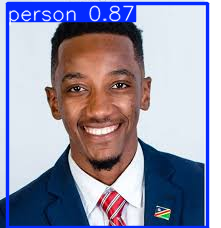


image 1/1 /content/drive/MyDrive/Colab Notebooks/HW_1/Yorkshire-boar.jpg.webp: 416x640 1 pig, 32.5ms
Speed: 7.7ms preprocess, 32.5ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 640)


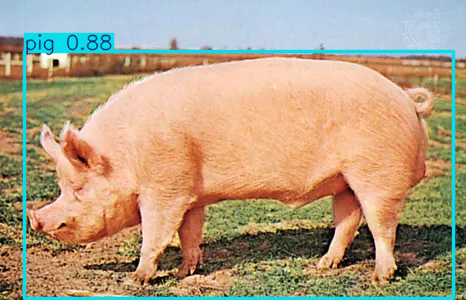

In [ ]:
results = model.predict("person.jpeg")
results[0].show()
results = model.predict("/content/drive/MyDrive/Colab Notebooks/HW_1/Yorkshire-boar.jpg.webp") # посмотрим на pig
results[0].show()

# Аугментцаия
Аугментацию лучше всего использовать после разделения данных к обучающей выборке, потому что если будем использовать до, то спровоцируем утечку данных. Наша задача еще усложняется тем, что нам вместе с картинками еще нужно менять координаты меток.

Так же заметим, что аугментация уже применялась к данным во время обучения, это можно увидеть по логам. Но в рамках задания мы обновим это все дело, постараемся не улететь за боксы)

In [ ]:
import albumentations as A
from ultralytics.data.augment import Albumentations
from ultralytics.utils import LOGGER, colorstr

def __init__(self, p=1.0):
    """Initialize the transform object for YOLO bbox formatted params."""
    self.p = p
    self.transform = None
    prefix = colorstr("albumentations: ")
    try:
        import albumentations as A

        spatial_transforms = {
            "Affine",
            "BBoxSafeRandomCrop",
            "CenterCrop",
            "CoarseDropout",
            "Crop",
            "CropAndPad",
            "CropNonEmptyMaskIfExists",
            "D4",
            "ElasticTransform",
            "Flip",
            "GridDistortion",
            "GridDropout",
            "HorizontalFlip",
            "Lambda",
            "LongestMaxSize",
            "MaskDropout",
            "MixUp",
            "Morphological",
            "NoOp",
            "OpticalDistortion",
            "PadIfNeeded",
            "Perspective",
            "PiecewiseAffine",
            "PixelDropout",
            "RandomCrop",
            "RandomCropFromBorders",
            "RandomGridShuffle",
            "RandomResizedCrop",
            "RandomRotate90",
            "RandomScale",
            "RandomSizedBBoxSafeCrop",
            "RandomSizedCrop",
            "Resize",
            "Rotate",
            "SafeRotate",
            "ShiftScaleRotate",
            "SmallestMaxSize",
            "Transpose",
            "VerticalFlip",
            "XYMasking",
        }

        # Здесь указываете ваш список аугментаций:
        T = [
            A.HorizontalFlip(p=0.5),
            A.VerticalFlip(p=0.5),
            A.GaussianBlur(blur_limit=(3, 7), p=0.3),
            A.SafeRotate(limit=15, p=0.3),
            A.RandomBrightnessContrast(p=0.2),
            A.GaussNoise(p=0.2)
        ]

        self.contains_spatial = any(transform.__class__.__name__ in spatial_transforms for transform in T)
        self.transform = (
            A.Compose(T, bbox_params=A.BboxParams(format="yolo", label_fields=["class_labels"]))
            if self.contains_spatial
            else A.Compose(T)
        )

        LOGGER.info(prefix + ", ".join(f"{x}".replace("always_apply=False, ", "") for x in T if x.p))
    except ImportError:
        # Если albumentations не установлен
        pass
    except Exception as e:
        LOGGER.info(f"{prefix}{e}")

Albumentations.__init__ = __init__


In [ ]:
model = YOLO('yolo11n.pt')
device = 'cuda:0'

100%|██████████| 5.35M/5.35M [00:00<00:00, 106MB/s]


In [ ]:
model.train(
    data = '/content/drive/MyDrive/Colab Notebooks/HW_1/dataset/data.yaml',
    device=device,
    plots=True,
    epochs=50,
    patience=10,
    batch=32,
)

Ultralytics 8.3.44 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/drive/MyDrive/dataset-2/data.yaml, epochs=50, time=None, patience=10, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=cuda:0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf

100%|██████████| 755k/755k [00:00<00:00, 46.0MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/drive/MyDrive/dataset-2/train/labels... 2029 images, 1 backgrounds, 0 corrupt: 100%|██████████| 2030/2030 [00:42<00:00, 47.80it/s] 


train: New cache created: /content/drive/MyDrive/dataset-2/train/labels.cache
albumentations: HorizontalFlip(p=0.5), VerticalFlip(p=0.5), GaussianBlur(p=0.3, blur_limit=(3, 7), sigma_limit=(0, 0)), SafeRotate(p=0.3, limit=(-15, 15), interpolation=1, border_mode=4, value=0, mask_value=0, rotate_method='largest_box', mask_interpolation=0), RandomBrightnessContrast(p=0.2, brightness_limit=(-0.2, 0.2), contrast_limit=(-0.2, 0.2), brightness_by_max=True), GaussNoise(p=0.2, var_limit=(10.0, 50.0), per_channel=True, mean=0.0, noise_scale_factor=1.0)


val: Scanning /content/drive/MyDrive/dataset-2/val/labels... 1015 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1015/1015 [00:24<00:00, 41.02it/s]


val: New cache created: /content/drive/MyDrive/dataset-2/val/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      5.11G      1.703      2.579      1.734         82        640: 100%|██████████| 64/64 [01:42<00:00,  1.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:22<00:00,  1.41s/it]


                   all       1015       2530      0.597      0.105      0.281      0.129

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50         5G      1.809      2.123      1.795        122        640: 100%|██████████| 64/64 [01:37<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:20<00:00,  1.26s/it]


                   all       1015       2530      0.418      0.365       0.32      0.155

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      4.78G      1.808      2.047      1.809         67        640: 100%|██████████| 64/64 [01:36<00:00,  1.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:18<00:00,  1.16s/it]


                   all       1015       2530      0.214      0.305      0.177     0.0769

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      5.82G      1.834      2.008      1.822         93        640: 100%|██████████| 64/64 [01:33<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:18<00:00,  1.18s/it]


                   all       1015       2530      0.313      0.308      0.242      0.101

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      5.06G      1.798      1.934      1.796         71        640: 100%|██████████| 64/64 [01:31<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:20<00:00,  1.26s/it]


                   all       1015       2530      0.334      0.369      0.276      0.129

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      5.29G      1.736      1.846      1.753         99        640: 100%|██████████| 64/64 [01:34<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:18<00:00,  1.14s/it]


                   all       1015       2530      0.459      0.528      0.462      0.228

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      5.17G      1.706      1.762      1.733        101        640: 100%|██████████| 64/64 [01:30<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:17<00:00,  1.10s/it]


                   all       1015       2530      0.381      0.396      0.336      0.155

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      5.04G      1.673       1.71      1.703         51        640: 100%|██████████| 64/64 [01:30<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:15<00:00,  1.01it/s]


                   all       1015       2530      0.566      0.503      0.536       0.29

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      4.95G      1.669      1.708      1.696         53        640: 100%|██████████| 64/64 [01:29<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:17<00:00,  1.06s/it]

                   all       1015       2530      0.627      0.538       0.57      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      5.17G      1.668      1.665      1.691         68        640: 100%|██████████| 64/64 [01:31<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:17<00:00,  1.10s/it]

                   all       1015       2530      0.605      0.524      0.547       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      5.04G      1.635      1.636       1.66         74        640: 100%|██████████| 64/64 [01:30<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:17<00:00,  1.12s/it]

                   all       1015       2530       0.62       0.55       0.58      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      4.93G      1.588       1.58      1.638         76        640: 100%|██████████| 64/64 [01:31<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:16<00:00,  1.02s/it]

                   all       1015       2530      0.687      0.593      0.657      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      5.19G      1.581      1.542       1.63         82        640: 100%|██████████| 64/64 [01:32<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:15<00:00,  1.00it/s]


                   all       1015       2530      0.711      0.572      0.641      0.352

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      4.93G      1.566      1.525      1.615        111        640: 100%|██████████| 64/64 [01:28<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:17<00:00,  1.07s/it]


                   all       1015       2530      0.617      0.593      0.633      0.351

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      4.93G      1.544      1.495        1.6         83        640: 100%|██████████| 64/64 [01:30<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:17<00:00,  1.10s/it]


                   all       1015       2530      0.621      0.598      0.621      0.348

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      4.99G      1.527      1.484      1.595        115        640: 100%|██████████| 64/64 [01:29<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:17<00:00,  1.09s/it]

                   all       1015       2530      0.714      0.608      0.657      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      5.47G      1.537      1.449      1.591         76        640: 100%|██████████| 64/64 [01:32<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:16<00:00,  1.04s/it]

                   all       1015       2530      0.691      0.622      0.685      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      5.39G      1.517      1.393      1.571        116        640: 100%|██████████| 64/64 [01:32<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:17<00:00,  1.11s/it]

                   all       1015       2530      0.714      0.637      0.703      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      4.99G      1.499      1.423      1.565         58        640: 100%|██████████| 64/64 [01:32<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:17<00:00,  1.10s/it]

                   all       1015       2530      0.679      0.639      0.695      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      4.91G      1.477      1.407      1.553         62        640: 100%|██████████| 64/64 [01:30<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:16<00:00,  1.01s/it]


                   all       1015       2530      0.744       0.66      0.734      0.421

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      4.97G      1.455      1.391      1.541         91        640: 100%|██████████| 64/64 [01:31<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:16<00:00,  1.03s/it]

                   all       1015       2530      0.705      0.648      0.703       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      4.81G       1.45      1.359      1.543         81        640: 100%|██████████| 64/64 [01:32<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:17<00:00,  1.11s/it]


                   all       1015       2530      0.703      0.615      0.684      0.408

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      5.12G      1.419      1.315      1.514         67        640: 100%|██████████| 64/64 [01:32<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:17<00:00,  1.09s/it]

                   all       1015       2530       0.72      0.709      0.755      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50       5.3G      1.434      1.316      1.517        101        640: 100%|██████████| 64/64 [01:31<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:17<00:00,  1.08s/it]

                   all       1015       2530      0.704      0.646      0.697      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      5.39G      1.427      1.293      1.504         67        640: 100%|██████████| 64/64 [01:32<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:16<00:00,  1.06s/it]

                   all       1015       2530      0.762      0.684      0.758      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      5.14G      1.417      1.287      1.493        108        640: 100%|██████████| 64/64 [01:32<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:17<00:00,  1.09s/it]

                   all       1015       2530      0.777      0.688      0.763       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50         5G      1.378      1.265      1.477         76        640: 100%|██████████| 64/64 [01:31<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:17<00:00,  1.10s/it]

                   all       1015       2530        0.8      0.688      0.771      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      5.08G      1.379      1.246      1.473        119        640: 100%|██████████| 64/64 [01:33<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:16<00:00,  1.02s/it]


                   all       1015       2530      0.771      0.715      0.784      0.482

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      5.19G      1.391      1.254      1.483         96        640: 100%|██████████| 64/64 [01:29<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:16<00:00,  1.03s/it]


                   all       1015       2530      0.754      0.715      0.785      0.494

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50       4.8G      1.351      1.226       1.46         79        640: 100%|██████████| 64/64 [01:32<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:16<00:00,  1.03s/it]

                   all       1015       2530      0.757       0.69      0.758      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      4.79G      1.338       1.22      1.453         98        640: 100%|██████████| 64/64 [01:32<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:17<00:00,  1.09s/it]

                   all       1015       2530      0.773      0.693      0.774      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      5.43G      1.335      1.209      1.446        211        640: 100%|██████████| 64/64 [01:33<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:17<00:00,  1.11s/it]

                   all       1015       2530      0.777      0.708      0.792      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      5.02G      1.336      1.195      1.452         91        640: 100%|██████████| 64/64 [01:31<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:18<00:00,  1.15s/it]

                   all       1015       2530      0.752      0.699      0.762      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      5.55G      1.309      1.165      1.427         87        640: 100%|██████████| 64/64 [01:32<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:17<00:00,  1.11s/it]

                   all       1015       2530      0.785      0.724      0.803      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      5.26G      1.306      1.148      1.418        122        640: 100%|██████████| 64/64 [01:33<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:17<00:00,  1.08s/it]


                   all       1015       2530      0.766      0.719      0.795      0.502

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      5.05G      1.276      1.123        1.4         89        640: 100%|██████████| 64/64 [01:32<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:16<00:00,  1.02s/it]


                   all       1015       2530       0.81      0.717      0.811      0.516

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      5.01G      1.294      1.137      1.417         95        640: 100%|██████████| 64/64 [01:32<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:18<00:00,  1.17s/it]

                   all       1015       2530      0.781      0.745      0.819      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      5.39G      1.287      1.126      1.407         81        640: 100%|██████████| 64/64 [01:34<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:17<00:00,  1.08s/it]

                   all       1015       2530      0.801      0.741       0.82      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      4.92G      1.277      1.125      1.405         86        640: 100%|██████████| 64/64 [01:34<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:16<00:00,  1.05s/it]

                   all       1015       2530      0.792       0.75      0.821      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      4.78G      1.243      1.093      1.378         94        640: 100%|██████████| 64/64 [01:32<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:19<00:00,  1.19s/it]


                   all       1015       2530      0.822      0.736      0.827       0.54
Closing dataloader mosaic
albumentations: HorizontalFlip(p=0.5), VerticalFlip(p=0.5), GaussianBlur(p=0.3, blur_limit=(3, 7), sigma_limit=(0, 0)), SafeRotate(p=0.3, limit=(-15, 15), interpolation=1, border_mode=4, value=0, mask_value=0, rotate_method='largest_box', mask_interpolation=0), RandomBrightnessContrast(p=0.2, brightness_limit=(-0.2, 0.2), contrast_limit=(-0.2, 0.2), brightness_by_max=True), GaussNoise(p=0.2, var_limit=(10.0, 50.0), per_channel=True, mean=0.0, noise_scale_factor=1.0)

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      4.92G      1.253      1.037      1.403         34        640: 100%|██████████| 64/64 [01:38<00:00,  1.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:17<00:00,  1.12s/it]


                   all       1015       2530        0.8      0.753      0.825      0.535

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      4.92G       1.23     0.9962      1.388         52        640: 100%|██████████| 64/64 [01:28<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:16<00:00,  1.04s/it]

                   all       1015       2530      0.821      0.742      0.834       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50       4.8G      1.216     0.9601      1.381         60        640: 100%|██████████| 64/64 [01:28<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:17<00:00,  1.11s/it]

                   all       1015       2530        0.8      0.769      0.839      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      4.95G      1.197     0.9461      1.359         34        640: 100%|██████████| 64/64 [01:28<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:18<00:00,  1.13s/it]

                   all       1015       2530      0.829      0.747       0.84      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      4.89G      1.206     0.9588      1.361         25        640: 100%|██████████| 64/64 [01:25<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:18<00:00,  1.14s/it]

                   all       1015       2530      0.803      0.765      0.843       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      4.88G      1.183     0.9257      1.347         49        640: 100%|██████████| 64/64 [01:29<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:17<00:00,  1.08s/it]

                   all       1015       2530      0.813      0.764      0.845       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50       4.9G      1.155     0.8982      1.328         66        640: 100%|██████████| 64/64 [01:26<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:18<00:00,  1.14s/it]

                   all       1015       2530      0.837      0.752      0.843       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50       4.9G      1.164     0.8997      1.345         56        640: 100%|██████████| 64/64 [01:30<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:16<00:00,  1.04s/it]

                   all       1015       2530      0.824      0.769      0.853      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      4.77G       1.16     0.9121      1.344         35        640: 100%|██████████| 64/64 [01:27<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:16<00:00,  1.04s/it]

                   all       1015       2530       0.84      0.753      0.851      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      4.91G      1.139     0.8853      1.318         53        640: 100%|██████████| 64/64 [01:30<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:17<00:00,  1.12s/it]

                   all       1015       2530      0.837      0.756      0.851      0.574



50 epochs completed in 1.556 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.44 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:19<00:00,  1.19s/it]


                   all       1015       2530       0.84      0.754      0.851      0.577
                person        517       1111      0.828      0.648      0.786      0.506
                   pig        498       1419      0.853       0.86      0.917      0.648
Speed: 0.3ms preprocess, 2.3ms inference, 0.0ms loss, 4.0ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ca2adee5cf0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [ ]:
model.save("NEW_person_pig_with_custom_aug.pt") # сохраним обученную модель

In [ ]:
my_model = YOLO("NEW_person_pig_with_custom_aug.pt")

In [ ]:
metrics = my_model.val(data = '/content/drive/MyDrive/Colab Notebooks/HW_1/dataset/data.yaml', split = 'test', device = device)

Ultralytics 8.3.44 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning /content/drive/MyDrive/dataset-2/test/labels... 1015 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1015/1015 [00:18<00:00, 56.14it/s]


val: New cache created: /content/drive/MyDrive/dataset-2/test/labels.cache


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:18<00:00,  3.40it/s]


                   all       1015       2520      0.837      0.767      0.856      0.583
                person        499       1035      0.828      0.691      0.818      0.533
                   pig        516       1485      0.846      0.843      0.894      0.634
Speed: 0.3ms preprocess, 5.5ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to runs/detect/val


Видим,что на предыдущих аугментациях модель справилась лучше